In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
%matplotlib inline

### Data Exploration and Preprocessing

In [2]:
df=pd.read_csv('C:/Users/RUTU/Desktop/Data Science/DS_New Assi/EDA2/EDA2/adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

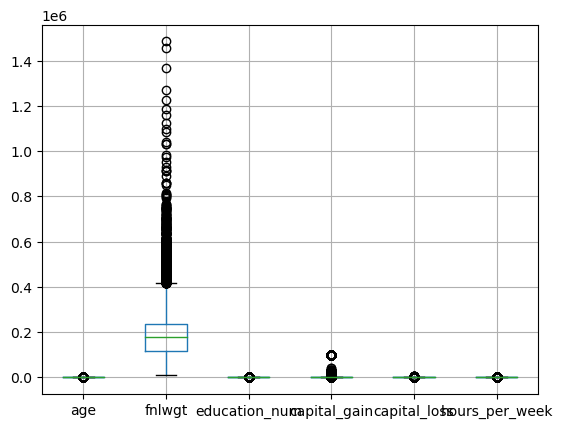

In [5]:
df.boxplot()

<Axes: xlabel='capital_gain', ylabel='capital_loss'>

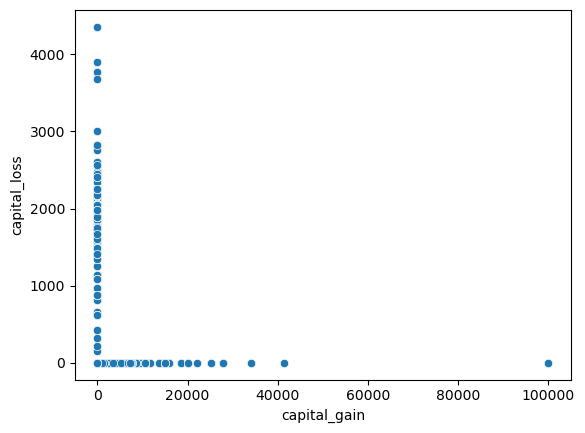

In [6]:
sns.scatterplot(x = df['capital_gain'],y =  df['capital_loss'])

<Axes: xlabel='age', ylabel='fnlwgt'>

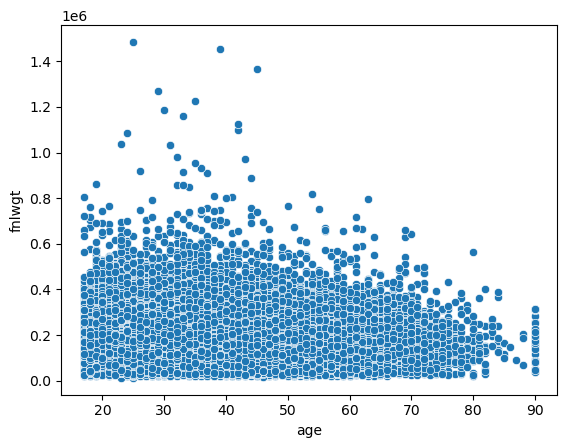

In [7]:
sns.scatterplot(x = df['age'],y =  df['fnlwgt'])

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])


### Encoding Techniques:

In [9]:
categorical_features = df.select_dtypes(include=['object']).columns
one_hot_features = [col for col in categorical_features if df[col].nunique() < 5]
df_one_hot_encoded = pd.get_dummies(df, columns=one_hot_features, drop_first=True)


In [10]:
from sklearn.preprocessing import LabelEncoder

label_features = [col for col in categorical_features if df[col].nunique() >= 5]
df_label_encoded = df.copy()
label_encoders = {}
for col in label_features:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le


### Feature Engineering:

In [11]:
# Example new features
df['age_education_num'] = df['age'] * df['education_num']
df['hours_per_week_per_age'] = df['hours_per_week'] / df['age']


In [12]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_education_num,hours_per_week_per_age
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,507,1.025641
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,650,0.260000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,342,1.052632
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,371,0.754717
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,364,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,324,1.407407
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,360,1.000000
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,522,0.689655
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,198,0.909091


In [13]:
# Identify skewed numerical features
skewed_features = df[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_feature = skewed_features.index[0]

# Apply log transformation
df[skewed_feature] = np.log1p(df[skewed_feature])


### Feature Selection:

In [14]:
from sklearn.ensemble import IsolationForest

# Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(df[numerical_features])
df = df[outliers != -1]


In [15]:
#!pip install ppscore

In [16]:
#pip install pandas==1.5.3

In [17]:
import ppscore as pps

# PPS matrix
pps_matrix = pps.matrix(df)
pps_matrix = pps_matrix[pps_matrix['ppscore'] > 0.2]  # example threshold
